![](Completment_Face.png)

导包  
人脸数据fetch_olivetti_faces  
分别使用线性回归，岭回归，KNN，以及ExtraTrees回归进行分析

In [1]:
import numpy as np

from sklearn.datasets import fetch_olivetti_faces

from sklearn.linear_model import LinearRegression,Ridge

from sklearn.neighbors import KNeighborsRegressor

#ensemble 综合的算法库，可以应用复杂的数据分析上
from sklearn.ensemble import ExtraTreesRegressor

#下周二 单一的模型
from sklearn.tree import DecisionTreeClassifier

生成训练数据和预测数据

In [2]:
face = fetch_olivetti_faces()
face

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
          0.16115703,  0.1570248 ],
        [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
          

In [3]:
x_data = face.data
y_target = face.target
x_data.shape

(400, 4096)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

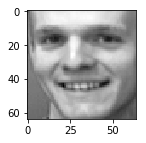

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(x_data[43].reshape((64,64)),cmap = 'gray')

In [13]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,train_size = 0.95)

In [20]:
#将X_train 人脸数据，一分为二，上半部分和下半部分
#上半部分，训练数据，下半部分，是训练数据所对应的结果

face_up_train = X_train[:,:2048]

face_down_train = X_train[:,2048:]

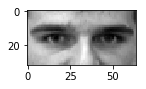

In [17]:
plt.figure(figsize=(2,1))
plt.imshow(face_train[0].reshape((32,64)),cmap = 'gray')

In [19]:
#将x_test 人脸数据，进行一分为二

face_up_test = x_test[:,:2048]

#真实结果
face_down_test = x_test[:,2048:]

In [21]:
knn = KNeighborsRegressor()

knn.fit(face_up_train,face_down_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [22]:
#对人脸数据进行预测,返回的数据就是人脸的下半部分
y_ = knn.predict(face_up_test)

In [23]:
y_.shape

(20, 2048)

In [29]:
#使用ridge
ridge = Ridge(alpha=1)

ridge.fit(face_up_train,face_down_train)

ridge_y_ = ridge.predict(face_up_test)

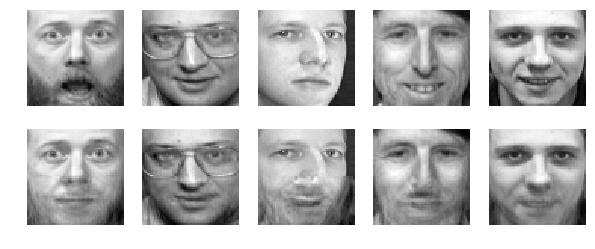

In [30]:
show_predict_result(ridge_y_)

In [31]:
extra_tree = ExtraTreesRegressor()

extra_tree.fit(face_up_train,face_down_train)

tree_y_ = extra_tree.predict(face_up_test)

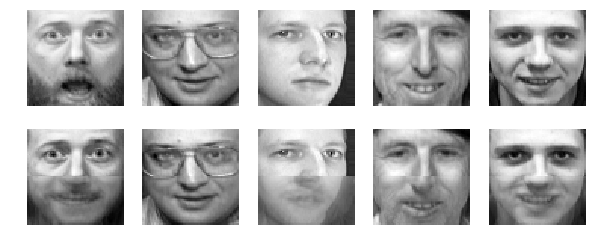

In [32]:
show_predict_result(tree_y_)

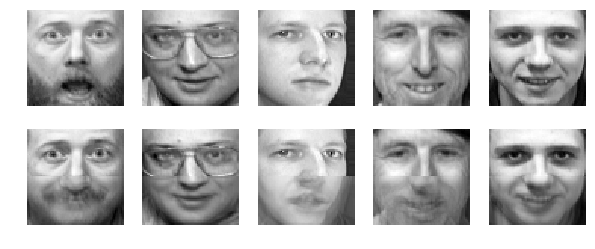

In [28]:
show_predict_result(y_)

In [27]:
def show_predict_result(y_):
    plt.figure(figsize=(5*2,2*2))

    for i in range(5):
    
        #第一行绘制真实的数据
    
        face_true = x_test[i].reshape((64,64))
    
        axes = plt.subplot(2,5,i + 1)
    
        axes.imshow(face_true,cmap = 'gray')
        plt.axis('off')
    
        #第二行绘制预测的数据
    
        #需要将人脸上半部分的数据和预测出来下半部分人脸数据进行拼接
    
        face_up = face_up_test[i]
        face_down = y_[i]
    
        face_predict = np.hstack((face_up,face_down)).reshape((64,64))
        axes = plt.subplot(2,5,i + 6)
    
        axes.imshow(face_predict,cmap = 'gray')
    
        plt.axis('off')

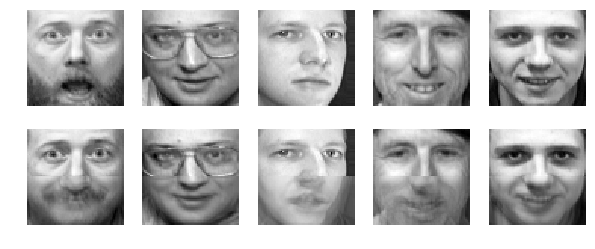

In [26]:
plt.figure(figsize=(5*2,2*2))

for i in range(5):
    
    #第一行绘制真实的数据
    
    face_true = x_test[i].reshape((64,64))
    
    axes = plt.subplot(2,5,i + 1)
    
    axes.imshow(face_true,cmap = 'gray')
    plt.axis('off')
    
    #第二行绘制预测的数据
    
    #需要将人脸上半部分的数据和预测出来下半部分人脸数据进行拼接
    
    face_up = face_up_test[i]
    face_down = y_[i]
    
    face_predict = np.hstack((face_up,face_down)).reshape((64,64))
    axes = plt.subplot(2,5,i + 6)
    
    axes.imshow(face_predict,cmap = 'gray')
    
    plt.axis('off')

In [33]:
y_test

array([25, 30,  0, 38, 11,  2, 14, 25, 33,  0, 17,  5, 35, 31, 14, 21,  9,
       35, 14, 16])

创建机器学习模型，以字典的形式包含四种模型

In [35]:
estimators = {'knn':KNeighborsRegressor(),
             'linear':LinearRegression(),
             'ridge':Ridge(),
             'extratree':ExtraTreesRegressor()}

In [37]:
#使用for循环对数据进行训练和预测
#字典形式来保存数据
y_ = dict()

for key ,estimator in estimators.items():
    
    estimator.fit(face_up_train,face_down_train)
    
    y = estimator.predict(face_up_test)
    
    y_[key] = y

使用模型训练数据并预测数据

In [38]:
#25, 30,  0, 38, 11
y_test

array([25, 30,  0, 38, 11,  2, 14, 25, 33,  0, 17,  5, 35, 31, 14, 21,  9,
       35, 14, 16])

In [39]:
x_test.shape

(20, 4096)

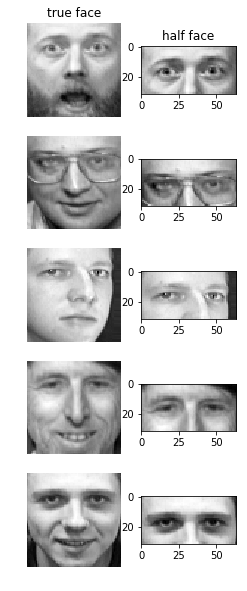

In [42]:
#将预测结果进行可视化
cols = 4 + 1 + 1

row = 5

plt.figure(figsize=(cols*2,row*2))
for i in range(row):
    
    #输出真实的数据
    true_face = x_test[i].reshape((64,64))
    
    axes = plt.subplot(row,cols,i*cols+1)
    if i:
        axes.imshow(true_face,cmap = 'gray')
    else:
        axes.imshow(true_face,cmap = 'gray')
        axes.set_title('true face')
    plt.axis('off')
    
    #第二列数据，显示半张脸
    #face_up_test
    face_half = face_up_test[i].reshape((32,64))
    axes = plt.subplot(row,cols,i*cols + 2)
    if i:
        axes.imshow(face_half,cmap = 'gray')
    else:
        axes.imshow(face_half,cmap = 'gray')
        axes.set_title('half face')
        
        
    #绘制机器学习的数据
    for j,key in enumerate(y_):
        
        predict_down_face = y_[key]
        
        down = predict_down_face[i]
        up = face_up_test[i]
        
        predict_face = np.hstack((up,down)).reshape((64,64))
        
        axes = plt.subplot(row,cols,i*cols + 3 + j)
        
        if i:
            axes.imshow(predict_face,cmap = 'gray')
        else:
            axes.imshow(predict_face,camp = 'gray')
            axes.set_title()

In [45]:
for key,pred in enumerate(y_):
    print(key,pred)

0 extratree
1 knn
2 ridge
3 linear
